In [1]:
%matplotlib inline

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [3]:
california_dataset = datasets.fetch_california_housing()

In [4]:
california_pd = pd.DataFrame(california_dataset.data)

In [5]:
california_pd.columns = california_dataset.feature_names

In [6]:
california_pd_target = np.asarray(california_dataset.target)

In [7]:
california_pd['MedHouseVal'] = pd.Series(california_pd_target)

In [8]:
X = california_pd.iloc[:, :-1]

In [9]:
Y = california_pd.iloc[:, -1]

In [10]:
Y 

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [11]:
print(california_pd)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [13]:
print("Train data shape for X = % s and Y = % s : "%(x_train.shape, y_train.shape))

Train data shape for X = (15480, 8) and Y = (15480,) : 


In [14]:
print("Test data shape for X = % s and Y = % s : "%(x_test.shape, y_test.shape))

Test data shape for X = (5160, 8) and Y = (5160,) : 


In [15]:
lreg = LinearRegression()

In [16]:
# Apply multiple linear regression model
lreg.fit(x_train, y_train)

LinearRegression()

In [17]:
# Generate predictions on the test set
lreg_y_predict = lreg.predict(x_test)

In [18]:
# Calculating Mean Squared Error (MSE)
mean_squared_error = np.mean((lreg_y_predict - y_test)**2)

In [19]:
print("Mean Squred Error on the test set: ", mean_squared_error)

Mean Squred Error on the test set:  0.5196843725574378


In [20]:
# Putting together the coefficients and their corresponging variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient["Coefficient Estimate"] = pd.Series(lreg.coef_)
print(lreg_coefficient)

      Columns  Coefficient Estimate
0      MedInc              0.431673
1    HouseAge              0.009318
2    AveRooms             -0.105886
3   AveBedrms              0.642559
4  Population             -0.000005
5    AveOccup             -0.004547
6    Latitude             -0.427816
7   Longitude             -0.443004


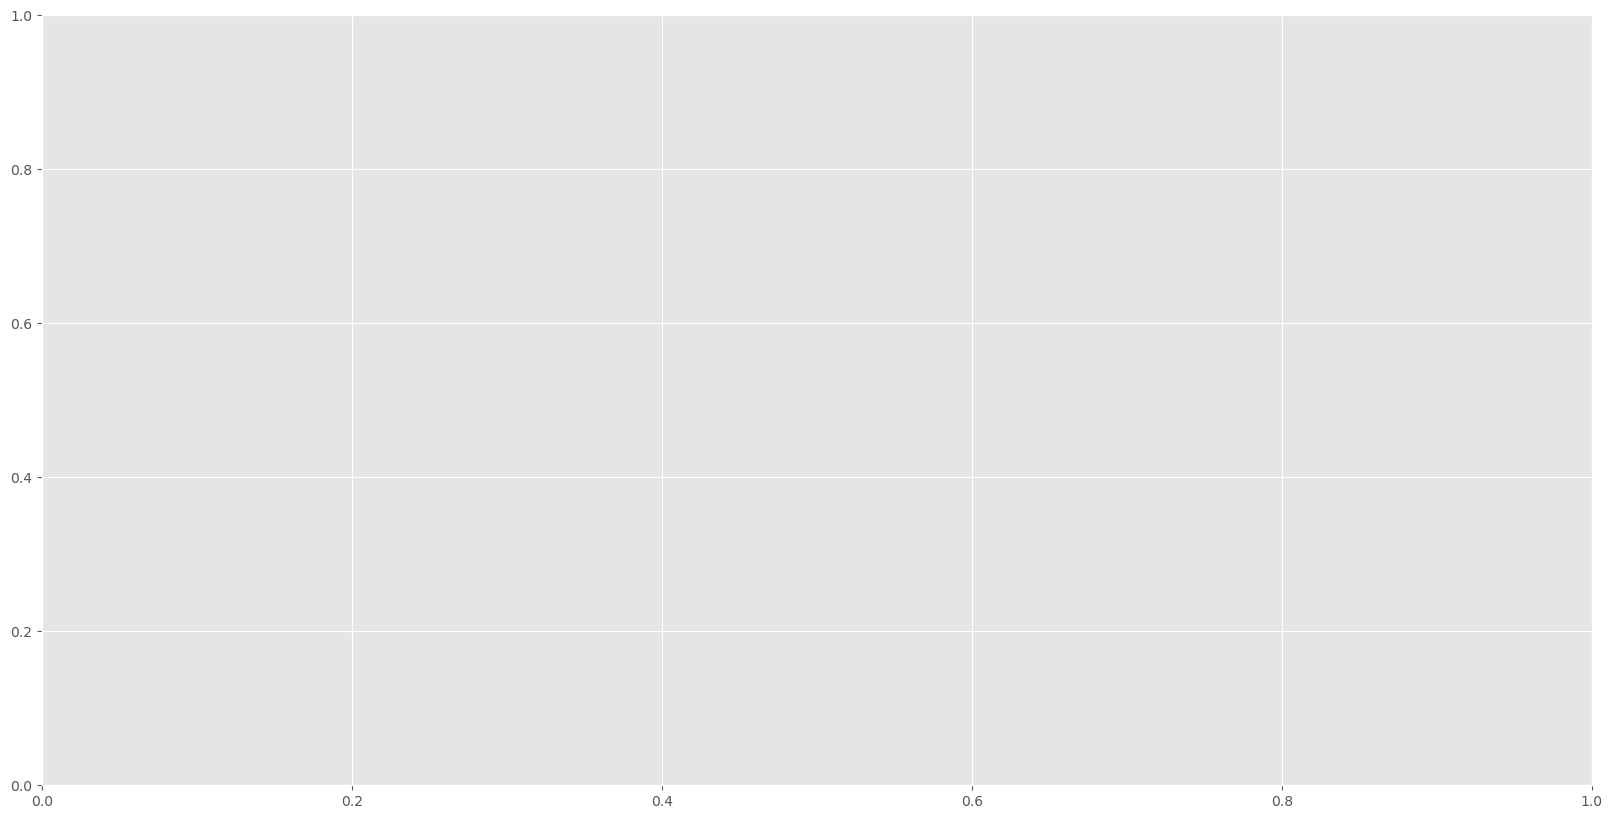

In [34]:
fig, ax = plt.subplots(figsize = (20, 10))

In [36]:
color = ['tab:grey', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

In [31]:
ax.bar(lreg_coefficient["Columns"], lreg_coefficient["Coefficient Estimate"], color = color)

<BarContainer object of 8 artists>

In [37]:
ax.spines['bottom'].set_position('zero')

In [38]:
plt.style.use('ggplot')
plt.show()

In [39]:
ridgeR = Ridge()

In [40]:
ridgeR.fit(x_train, y_train)

Ridge()

In [42]:
y_predict = ridgeR.predict(x_test)

In [43]:
# Calculating Mean Squared Error (MSE)
mean_squared_error = np.mean((y_predict - y_test)**2)

In [44]:
print("Mean Squred Error on the test set: ", mean_squared_error)

Mean Squred Error on the test set:  0.5196836578815693


In [49]:
lasso = Lasso()

In [55]:
lasso.fit(x_train, y_train)

Lasso()

In [56]:
y_predict_lasso = lasso.predict(x_test)

In [57]:
# Calculating Mean Squared Error (MSE)
mean_squared_error = np.mean((y_predict_lasso - y_test)**2)

In [58]:
print("Mean Squred Error on the test set: ", mean_squared_error)

Mean Squred Error on the test set:  0.93903981920115
